# Problem Statrment

1. Outlets in Bangalore ?
2. Resturants most famous dishes?
3. Most popular cuisines of Bangalore?
4. Rating vs price for zomato resturant and non-zomato resturant?
5. Highest voted resturant

# Assumption

1. Missing Rating is filled by taking mean of non-missing rating
2. Impute location from address

## Prepare Data

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
resturant_data = pd.read_csv("C:\\Users\\bhupe\\OneDrive\\Desktop\\Portfolio Project\\Python Project\\Udemy\\Zomato Data Analysis\\zomato.csv")


In [3]:
resturant = resturant_data.copy()
resturant.head(5)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
resturant.tail()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield
51716,https://www.zomato.com/bangalore/the-nest-the-...,"ITPL Main Road, KIADB Export Promotion Industr...",The Nest - The Den Bengaluru,No,No,3.4 /5,13,+91 8071117272,"ITPL Main Road, Whitefield","Bar, Casual Dining",NaN,"Finger Food, North Indian, Continental","1,500","[('Rated 5.0', 'RATED\n Great ambience , look...",[],Pubs and bars,Whitefield


In [5]:
resturant.shape

(51717, 17)

In [6]:
resturant.drop_duplicates(keep = "first", inplace = True)
resturant.shape

(51717, 17)

In [7]:
resturant.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [8]:
resturant.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [9]:
resturant.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [10]:
## percentage missing values
for col in resturant.columns:
    missing_pct = len(resturant[resturant[col].isnull()]) / len(resturant[col]) * 100
    print(col ,":" ,missing_pct,"%")

url : 0.0 %
address : 0.0 %
name : 0.0 %
online_order : 0.0 %
book_table : 0.0 %
rate : 15.033741322969234 %
votes : 0.0 %
phone : 2.335789005549432 %
location : 0.04060560357329312 %
rest_type : 0.438927238625597 %
dish_liked : 54.29162557766305 %
cuisines : 0.08701200765705668 %
approx_cost(for two people) : 0.669025658874258 %
reviews_list : 0.0 %
menu_item : 0.0 %
listed_in(type) : 0.0 %
listed_in(city) : 0.0 %


## Data Cleaning, Transformation, Missing value handling

In [11]:
resturant.describe(include= "object")

,url,address,name,online_order,book_table,rate,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
count,51717,51717,51717,51717,51717,43942,50509,51696,51490,23639,51672,51371,51717,51717,51717,51717
unique,51717,11495,8792,2,2,64,14926,93,93,5271,2723,70,22513,9098,7,30
top,https://www.zomato.com/bangalore/jalsa-banasha...,Delivery Only,Cafe Coffee Day,Yes,No,NEW,080 43334321,BTM,Quick Bites,Biryani,North Indian,300,[],[],Delivery,BTM
freq,1,128,96,30444,45268,2208,216,5124,19132,182,2913,7576,7595,39617,25942,3279


In [12]:
# handling rate column 
resturant["rate"] = resturant["rate"].astype(str)
resturant["rate"] = [i.split("/")[0] for i in resturant["rate"]]

resturant = resturant.replace({
     "rate" : ["-", "NEW", np.nan]
}, np.nan , regex= True
)

resturant["rate"] = resturant["rate"].astype(float)
resturant["rate"].fillna(resturant["rate"].mean(), inplace = True)

# handle phone column
resturant.drop(columns= "phone" , inplace = True)



In [13]:
# handle location column
def loc_address(lst):
    location = lst[0]
    address = lst[1]
    
    if pd.isnull(location):
        return address.split(",")[len(address.split(",")) - 2]
    else:
        return location
    
resturant["location"] = resturant[["location", "address"]].apply(loc_address,axis=1)

In [14]:
# handle other null columns
resturant["rest_type"].fillna("unknown", inplace= True)
resturant["dish_liked"].fillna("unknown", inplace= True)
resturant["cuisines"].fillna("unknown", inplace= True)


In [15]:
# handle cost column
def impute_cost(element):
    if pd.isnull(element):
        return element
    else:
        return element.replace(",","")
   
        

resturant["approx_cost(for two people)"] = resturant["approx_cost(for two people)"].apply(impute_cost)

resturant["approx_cost(for two people)"] = resturant["approx_cost(for two people)"].astype(float)


In [16]:
resturant.dropna(inplace = True)

# Data Analysis

## 1. Outlets in Bangalore

In [17]:
resturant.head(2)

,url,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


In [18]:
total_locations =  len(resturant["location"].unique())
total_locations

93

<AxesSubplot:>

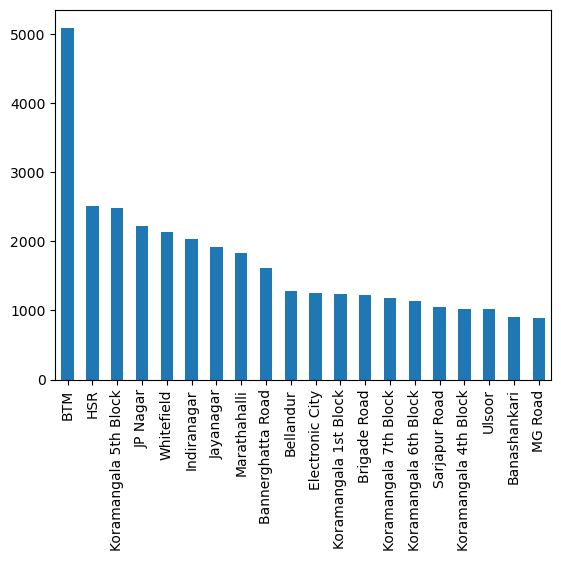

In [84]:
resturant["location"].value_counts()[0:20].plot(kind= "bar")

## Resturants most famous dishes

In [20]:
total_dishes= []

for element in resturant["dish_liked"]:
    dishes = element.split(",")
    total_dishes.extend(dishes)  

total_dishes = [x.strip() for x in total_dishes]
        
    
    

In [21]:

for item in total_dishes:
    if item == "unknown":
        total_dishes.remove("unknown")
    


In [22]:
total_dishes.index("unknown")

74080

Text(0.5, 1.0, 'Most Famous Dishes')

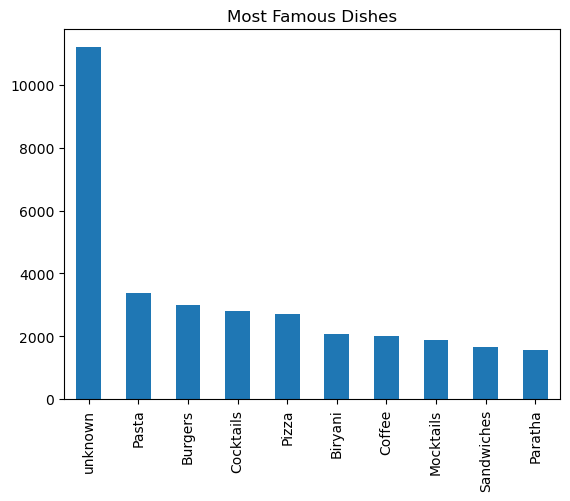

In [23]:
all_dishes = pd.Series(total_dishes)
all_dishes.value_counts()[0:10].plot(kind= "bar")
plt.title("Most Famous Dishes")


### Fast Foods or ready to eat foods are famous

In [24]:
from collections import Counter
count= Counter(total_dishes)
count

Counter({'Pasta': 3383,
         'Lunch Buffet': 399,
         'Masala Papad': 150,
         'Paneer Lajawab': 13,
         'Tomato Shorba': 16,
         'Dum Biryani': 196,
         'Sweet Corn Soup': 136,
         'Momos': 936,
         'Chocolate Nirvana': 4,
         'Thai Green Curry': 65,
         'Paneer Tikka': 564,
         'Chicken Biryani': 1326,
         'Churros': 95,
         'Cannelloni': 11,
         'Minestrone Soup': 48,
         'Hot Chocolate': 775,
         'Pink Sauce Pasta': 11,
         'Salsa': 140,
         'Veg Supreme Pizza': 15,
         'Masala Dosa': 697,
         'Panipuri': 429,
         'Gol Gappe': 41,
         'Onion Rings': 198,
         'Kadhai Paneer': 80,
         'Salads': 1390,
         'Salad': 776,
         'Roti': 856,
         'Jeera Rice': 179,
         'Farmhouse Pizza': 9,
         'Chocolate Banana': 16,
         'Virgin Mojito': 127,
         'Lime Soda': 142,
         'Prawn Pizza': 24,
         'Pizza': 2701,
         'Mocktails': 18

## 3.Most popular Cuisines of Bangalore

In [29]:
total_cuisines= []

for element in resturant["cuisines"]:
    cuisine = element.split(",")
    total_cuisines.extend(cuisine)  

total_cuisines = [x.strip() for x in total_cuisines]
total_cuisines
        

['North Indian',
 'Mughlai',
 'Chinese',
 'Chinese',
 'North Indian',
 'Thai',
 'Cafe',
 'Mexican',
 'Italian',
 'South Indian',
 'North Indian',
 'North Indian',
 'Rajasthani',
 'North Indian',
 'North Indian',
 'South Indian',
 'Andhra',
 'Chinese',
 'Pizza',
 'Cafe',
 'Italian',
 'Cafe',
 'Italian',
 'Continental',
 'Cafe',
 'Mexican',
 'Italian',
 'Momos',
 'Beverages',
 'Cafe',
 'Cafe',
 'Italian',
 'Continental',
 'Cafe',
 'Chinese',
 'Continental',
 'Italian',
 'Cafe',
 'Continental',
 'Cafe',
 'Mexican',
 'Italian',
 'Cafe',
 'Cafe',
 'Fast Food',
 'Continental',
 'Chinese',
 'Momos',
 'Chinese',
 'Cafe',
 'Italian',
 'Cafe',
 'Italian',
 'American',
 'Cafe',
 'Chinese',
 'Continental',
 'Italian',
 'Cafe',
 'French',
 'North Indian',
 'Cafe',
 'Pizza',
 'Fast Food',
 'Beverages',
 'Cafe',
 'Fast Food',
 'Italian',
 'Fast Food',
 'Cafe',
 'European',
 'Cafe',
 'Cafe',
 'Bakery',
 'Cafe',
 'South Indian',
 'Cafe',
 'Fast Food',
 'Beverages',
 'Cafe',
 'Fast Food',
 'North Indian

In [31]:
all_cuisines = pd.Series(total_cuisines)
all_cuisines.value_counts()[ : 20]


North Indian    20963
Chinese         15451
South Indian     8590
Fast Food        8070
Biryani          6476
Continental      5721
Desserts         5598
Cafe             5251
Beverages        4701
Italian          3364
Bakery           2828
Street Food      2581
Pizza            2049
Burger           1984
Seafood          1796
Ice Cream        1756
Andhra           1754
Mughlai          1563
Rolls            1466
American         1457
dtype: int64

### In Bangalore also, North Indian and Chinese cuisines are dominating

## 4 . Rating vs Price for Zomato and non-zomato resturants

In [49]:
resturant["rate"].corr(resturant["approx_cost(for two people)"])

0.3659178988499324

In [50]:
zomato_resturant = resturant[resturant["online_order"] == "Yes"]
non_zomato_resturant = resturant[resturant["online_order"] == "No"]

In [51]:
zomato_resturant["rate"].corr(zomato_resturant["approx_cost(for two people)"])

0.37828550302861386

In [52]:
non_zomato_resturant["rate"].corr(non_zomato_resturant["approx_cost(for two people)"])

0.393746448150583

C:\Users\bhupe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


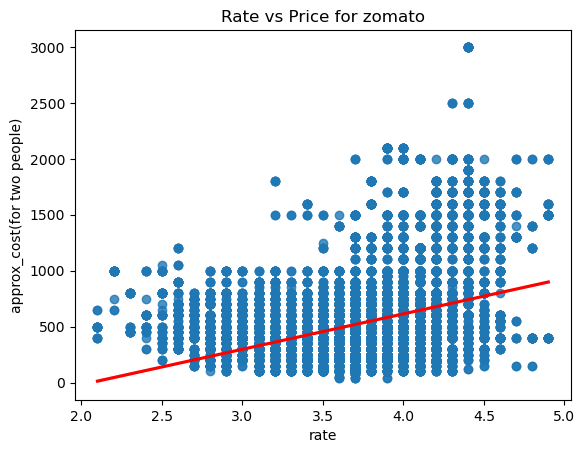

In [53]:
sns.regplot(zomato_resturant["rate"], zomato_resturant["approx_cost(for two people)"] , data =zomato_resturant, line_kws={"color": "r"} )
plt.title("Rate vs Price for zomato")
plt.show()

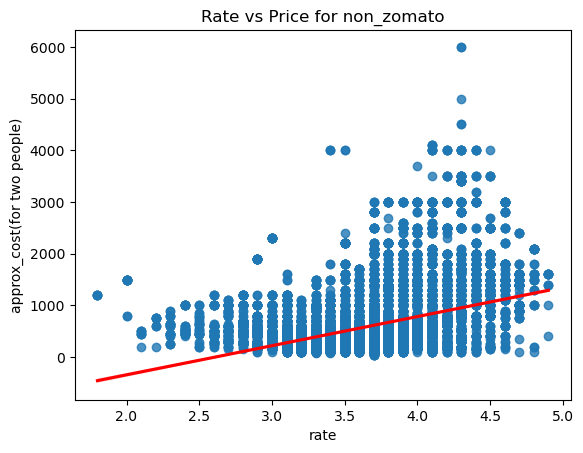

In [54]:
sns.regplot(non_zomato_resturant["rate"], non_zomato_resturant["approx_cost(for two people)"] , data = non_zomato_resturant, line_kws={"color": "r"} )
plt.title("Rate vs Price for non_zomato")
plt.show()

C:\Users\bhupe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='rate', ylabel='approx_cost(for two people)'>

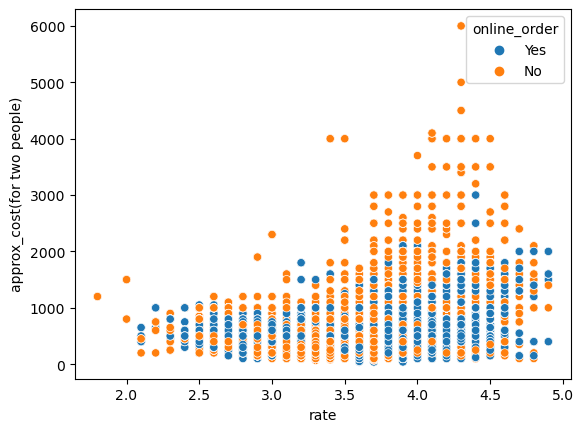

In [55]:
sns.scatterplot(resturant["rate"], resturant["approx_cost(for two people)"] , data = resturant, hue = resturant["online_order"])

### In both Zomato and Non-Zomato resturants Cost and Price have positive relationship

## 5. Highest voted Resturants

In [56]:
resturant.sort_values("votes", ascending= False).head()

,url,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
49170,https://www.zomato.com/bangalore/byg-brewski-b...,"Behind MK Retail, Sarjapur Road, Bangalore",Byg Brewski Brewing Company,Yes,Yes,4.9,16832,Sarjapur Road,Microbrewery,"Cocktails, Butter Chicken, Dahi Kebab, Rajma C...","Continental, North Indian, Italian, South Indi...",1600.0,"[('Rated 5.0', ""RATED\n This is an absolute g...",[],Delivery,Sarjapur Road
49627,https://www.zomato.com/bangalore/byg-brewski-b...,"Behind MK Retail, Sarjapur Road, Bangalore",Byg Brewski Brewing Company,Yes,Yes,4.9,16832,Sarjapur Road,Microbrewery,"Cocktails, Butter Chicken, Dahi Kebab, Rajma C...","Continental, North Indian, Italian, South Indi...",1600.0,"[('Rated 4.0', 'RATED\n Visiting a microbrewe...",[],Dine-out,Sarjapur Road
50059,https://www.zomato.com/bangalore/byg-brewski-b...,"Behind MK Retail, Sarjapur Road, Bangalore",Byg Brewski Brewing Company,Yes,Yes,4.9,16832,Sarjapur Road,Microbrewery,"Cocktails, Butter Chicken, Dahi Kebab, Rajma C...","Continental, North Indian, Italian, South Indi...",1600.0,"[('Rated 4.0', 'RATED\n Visiting a microbrewe...",[],Drinks & nightlife,Sarjapur Road
4944,https://www.zomato.com/bangalore/byg-brewski-b...,"Behind MK Retail, Sarjapur Road, Bangalore",Byg Brewski Brewing Company,Yes,Yes,4.9,16345,Sarjapur Road,Microbrewery,"Cocktails, Dahi Kebab, Rajma Chawal, Butter Ch...","Continental, North Indian, Italian, South Indi...",1600.0,"[('Rated 5.0', 'RATED\n I have been to this p...","['Creamy Mushroom and Truffle Soup', 'Kung Pao...",Drinks & nightlife,Bellandur
3921,https://www.zomato.com/bangalore/byg-brewski-b...,"Behind MK Retail, Sarjapur Road, Bangalore",Byg Brewski Brewing Company,Yes,Yes,4.9,16345,Sarjapur Road,Microbrewery,"Cocktails, Dahi Kebab, Rajma Chawal, Butter Ch...","Continental, North Indian, Italian, South Indi...",1600.0,"[('Rated 5.0', 'RATED\n I have been to this p...",[],Delivery,Bellandur


In [57]:
resturant_votes = resturant.drop_duplicates(subset= ["name", "address", "location"], keep= "first" )
resturant_votes.shape

(12473, 16)

In [58]:
votes_df = resturant_votes[["name", "votes"]].sort_values("votes", ascending= False)[:10]
votes_df.set_index("name", inplace= True)
votes_df

,votes
name,
Byg Brewski Brewing Company,16345
Toit,14956
Truffles,14654
AB's - Absolute Barbecues,12121
The Black Pearl,10413
Onesta,9041
Big Pitcher,9021
Arbor Brewing Company,8375
Empire Restaurant,8176


<AxesSubplot:xlabel='name'>

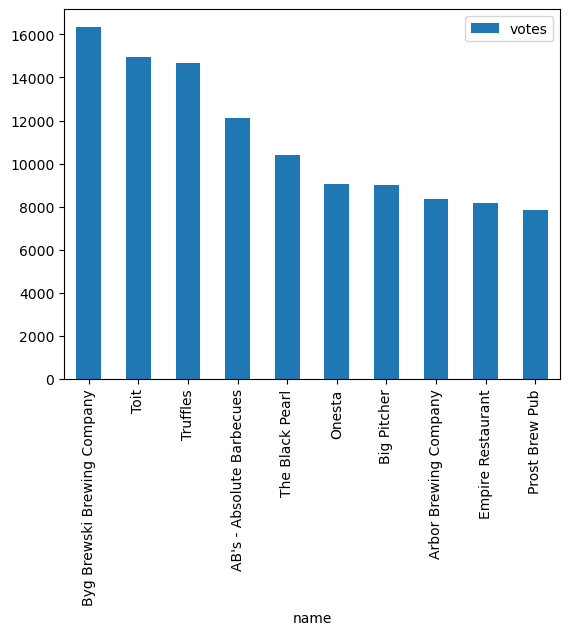

In [59]:
votes_df.plot(kind= "bar")

# Offline vs online order votes difference

<AxesSubplot:xlabel='online_order', ylabel='votes'>

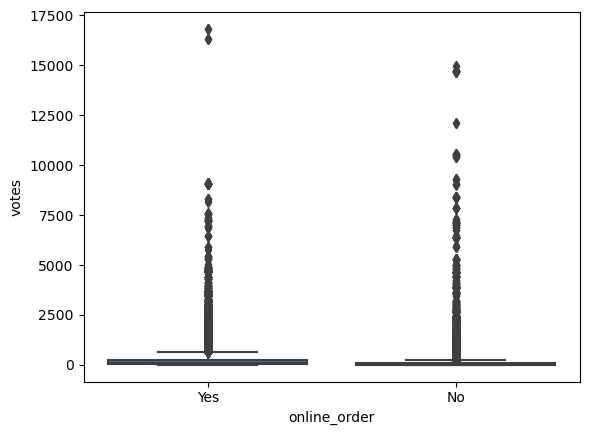

In [63]:
sns.boxplot(x = resturant["online_order"], y= resturant["votes"] )

# Offline vs online order price difference

<AxesSubplot:xlabel='online_order', ylabel='approx_cost(for two people)'>

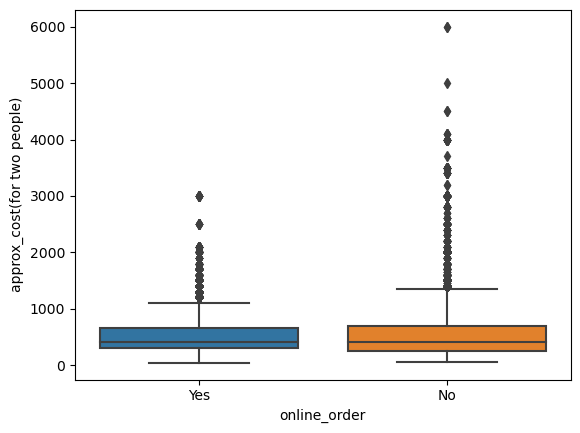

In [64]:
sns.boxplot(x = resturant["online_order"], y= resturant["approx_cost(for two people)"] )

# Most Luxurious resturants of Bangalore

In [65]:
resturant.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [80]:
unique_resturant = resturant[["name", "approx_cost(for two people)","location"]].drop_duplicates()
unique_resturant.sort_values(by =  "approx_cost(for two people)", ascending = False).head(10)

,name,approx_cost(for two people),location
19139,Le Cirque Signature - The Leela Palace,6000.0,Old Airport Road
40266,Royal Afghan - ITC Windsor,5000.0,Sankey Road
41591,Malties - Radisson Blu,4500.0,Marathahalli
37715,La Brasserie - Le Meridien,4100.0,Sankey Road
40278,Dum Pukht Jolly Nabobs - ITC Windsor,4000.0,Sankey Road
40274,Dakshin - ITC Windsor,4000.0,Sankey Road
6104,Alba - JW Marriott Bengaluru,4000.0,Lavelle Road
6323,Grill 99 - The Ritz-Carlton,4000.0,Residency Road
13071,Masala Klub - The Taj West End,4000.0,Race Course Road
19121,Jamavar - The Leela Palace,4000.0,Old Airport Road


### Generally Online resturant resturant are more cheaper than Offline resturant

# Most Affordable resturants

In [77]:
unique_resturant[unique_resturant["approx_cost(for two people)"] <= 500]

,name,approx_cost(for two people)
3,Addhuri Udupi Bhojana,300.0
10,CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The A...,500.0
12,The Coffee Shack,500.0
13,Caf-Eleven,450.0
18,T3H Cafe,300.0
...,...,...
51587,Shrawan Restaurant,300.0
51595,Calcutta North Indian Meals,200.0
51614,Nawabs Empire,300.0
51627,New Shalimar Hotel,300.0


# Suggestions:

## 1. Rating is proportional to Price of food, so resturants should not compromise quality for reducing price
## 2. Zomato should promote more fast foods or North Indian and Chinese Cuisines on its app and website as they are on more demand side


# More Data Analysis

## Avg, rating of each resturant

In [ ]:
rated_df = resturant.groupby("name")["rate"].mean().sort_values(ascending = False).to_frame()
rated_df.reset_index(inplace = True)
rated_df.columns = ["name", "avg_rating"]
rated_df

In [ ]:
rated_df["avg_rating"].plot(kind= "box")
plt.show()

In [ ]:
sns.distplot(rated_df["avg_rating"] , bins = 10)


#### AVG. RATING OF EACH RESTURANT IN RANGE OF 3.5 to 3.8

# Top resturant chain in Bangalore

In [ ]:
resturant["name"].value_counts()[ : 20].plot(kind = "barh" )

In [ ]:
# How many 

In [ ]:
order_type = resturant["online_order"].value_counts(normalize =True).to_frame()
order_type

In [ ]:
resturant.head(3)

In [ ]:
resturant.describe(include = "object")

In [ ]:
resturant["name"].value_counts()

# Resturants by location

In [ ]:
location = []
rest_num = []
for key ,rest_df in resturant.groupby("location"):
    location.append(key)
    rest_num.append(len(rest_df["name"].unique()))

rest_by_location = pd.DataFrame(zip(location, rest_num))
rest_by_location.head()

    

In [ ]:
rest_by_location.columns= ["location","resturant_number"]
rest_by_location.head()

In [ ]:
rest_location = rest_by_location.sort_values(by = "resturant_number" , ascending = False).head(10)
rest_location

In [ ]:
rest_location.plot(kind= "bar")

# Approximate cost for food

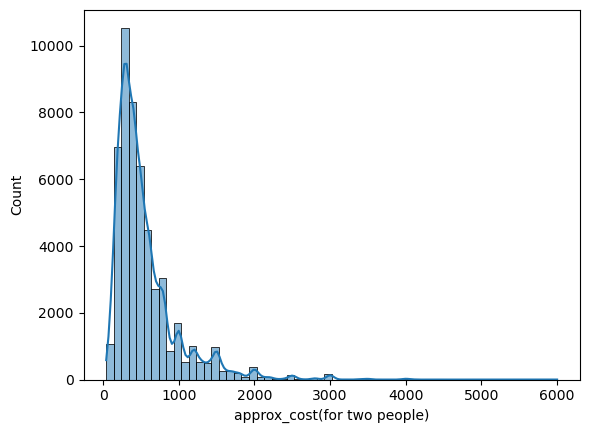

In [46]:
sns.histplot(resturant["approx_cost(for two people)"] , bins = 60 , kde =True)
plt.show()

### Food is generally ranging between 50 to 1000rs . So it is affordable

In [81]:
unique_resturant["location"].value_counts()

Whitefield              850
BTM                     757
Electronic City         711
HSR                     708
Marathahalli            684
                       ... 
Rajarajeshwari Nagar      2
Central Bangalore         2
Kengeri                   1
Jakkur                    1
Peenya                    1
Name: location, Length: 93, dtype: int64